<a href="https://colab.research.google.com/github/suryagokul/Deep-Learning/blob/main/HandWritten_Digits_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten digits Classification

In [62]:
import tensorflow as tf

In [278]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [279]:
X_train.shape,X_test.shape                        # Having 60,000 images of 28 * 28 matrix.

((60000, 28, 28), (10000, 28, 28))

In [280]:
X_train[100].shape

(28, 28)

In [281]:
X_train , X_test = X_train/255, X_test/255                # Normalizing data between 0 to 1

In [282]:
import matplotlib.pyplot as plt


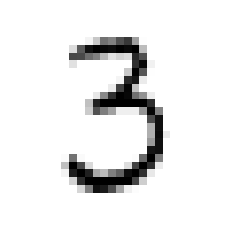

In [283]:
plt.imshow(X_train[50],cmap='binary')
plt.axis('off')
plt.show()

In [284]:
import seaborn as sns

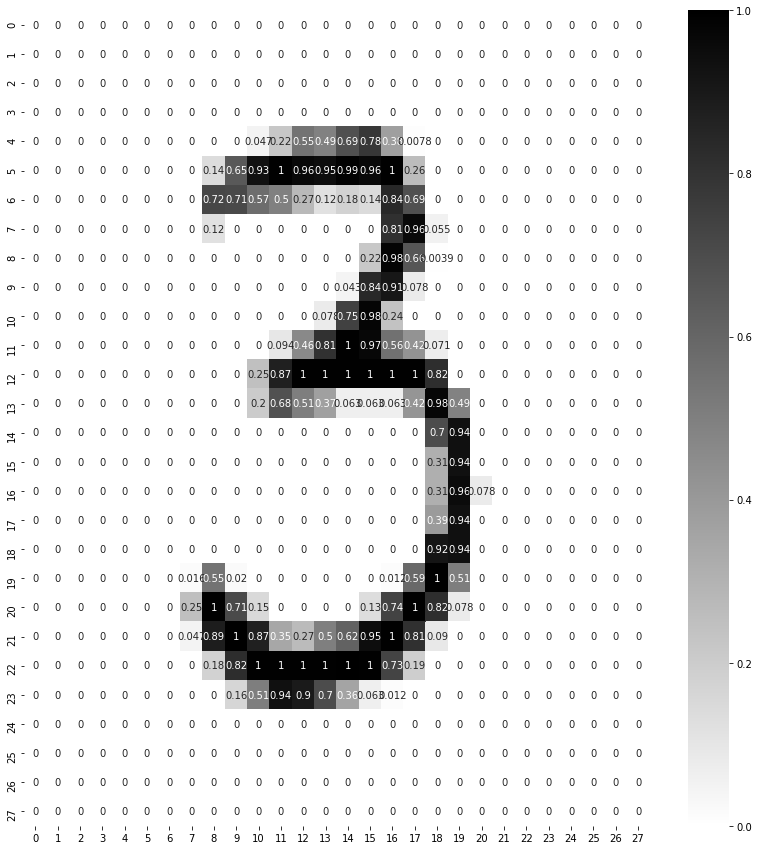

In [285]:
plt.figure(figsize=(14,15))
sns.heatmap(X_train[50],annot=True,cmap='binary')

In [286]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=[28, 28],name="inputLayer"))

model.add(tf.keras.layers.Dense(300, activation="relu",name="hiddenLayer1"))

model.add(tf.keras.layers.Dense(100, activation="relu",name="hiddenLayer2"))

model.add(tf.keras.layers.Dense(10, activation="softmax",name="outputLayer"))

In [287]:
model.layers

In [288]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#firsLayer * secondLayer + bias
# 784*300 + 300, 300*100+100, 100*10+10 =  (235500, 30100, 1010)

In [289]:
hidden1 = model.layers[1]


In [290]:
hidden1.name

'hiddenLayer1'

In [291]:
weights,bias = hidden1.get_weights()

In [292]:
print(weights)

bias                    # Weights initialized with random and bias initialized with 0's..

[[-0.05559811  0.0247461   0.06148523 ... -0.03344956  0.00768515
   0.00869542]
 [-0.03834974 -0.01215802  0.06584218 ...  0.01848396  0.0165828
  -0.06357548]
 [ 0.05637269  0.03221941 -0.01913061 ...  0.03889931  0.00176412
   0.02387432]
 ...
 [ 0.00127989 -0.06461009 -0.00083808 ... -0.02702921 -0.05945008
  -0.02408896]
 [-0.06700008 -0.05501223  0.0022498  ...  0.06680505 -0.05822433
  -0.03038092]
 [-0.04191826  0.02315432  0.06810084 ... -0.00927728  0.07353096
  -0.00812124]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [293]:
weights.shape,bias.shape

((784, 300), (300,))

In [294]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
# OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]



model.compile(loss=LOSS_FUNCTION,
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=METRICS)

In [295]:
savedmodel = model.save('Model.h5')          

In [296]:
EPOCHS = 5
VALIDATION_SET = (X_test, y_test)

fit_model = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2025 - accuracy: 0.9397 - val_loss: 0.1035 - val_accuracy: 0.9675
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0820 - accuracy: 0.9741 - val_loss: 0.0769 - val_accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0758 - val_accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0965 - val_accuracy: 0.9715
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0861 - val_accuracy: 0.9793


In [298]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9793


[0.08611349016427994, 0.9793000221252441]

In [299]:
fit_model.params

{'epochs': 5, 'steps': 1875, 'verbose': 1}

In [300]:
import pandas as pd

history = pd.DataFrame(fit_model.history)

history

,loss,accuracy,val_loss,val_accuracy
0,0.202520,0.939733,0.103522,0.9675
1,0.081961,0.974083,0.076886,0.9753
2,0.059156,0.981650,0.075831,0.9780
3,0.041928,0.986750,0.096540,0.9715
4,0.033563,0.989267,0.086113,0.9793


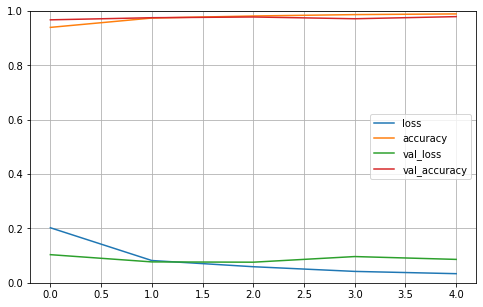

In [301]:
pd.DataFrame(fit_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [302]:
ypred = model.predict(X_test[3:6])

In [303]:
ypred = ypred.round(2)

ypred

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0.1],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]], dtype=float32)

In [304]:
ypred = np.argmax(ypred,axis=-1)

ypred

array([0, 4, 1])

Actual: 0, Predicted: 0 


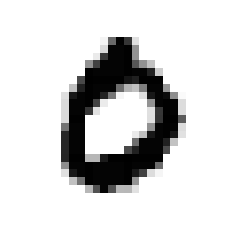

Actual: 4, Predicted: 4 


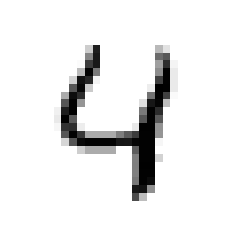

Actual: 1, Predicted: 1 


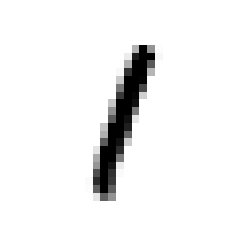

In [305]:
for img,actual,pred in zip(X_test[3:6],y_test[3:6],ypred):
  print(f"Actual: {actual}, Predicted: {pred} ")
  plt.imshow(img,cmap='binary')
  plt.axis('off')
  plt.show()

# Predicting Custom Image

In [192]:
from keras.preprocessing.image import img_to_array

from keras.preprocessing.image import array_to_img

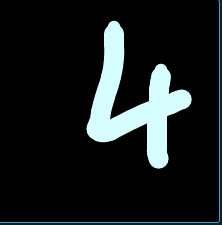

In [362]:
digit = load_img('4.PNG')

digit

In [370]:
x = img_to_array(digit)

In [371]:
x.shape

(225, 222, 3)

In [372]:
x = tf.image.rgb_to_grayscale(x)

x.shape

TensorShape([225, 222, 1])

In [373]:
x = np.expand_dims(x, axis=0)

x = x/255.0

x.shape

(1, 225, 222, 1)

In [374]:
x = np.resize(x, (28,28))

x.shape

(28, 28)

In [375]:
x = x.reshape(1,28,28)

x.shape

(1, 28, 28)

In [360]:
np.argmax(model.predict(x).round(2),axis=-1)       # Predicted value is 4..

array([4])